In [2]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [7]:
BETA_MIN = 0
BETA_MAX = 5
BETAS = BETA_MIN:BETA_MAX

colors = theme_palette(:auto)


In [5]:
CSV_DIR = joinpath(@__DIR__, "..", "dump", "scale")
function loadDataFrame(w, d, method)
  basename = "$(string(method))-rand-I2-O2-W$(w)-D$(d).nnet.csv"
  csv_file = joinpath(CSV_DIR, "$(basename)")
  return CSV.File(csv_file)
end

WIDTHS = [10; 20]
DEPTHS = 5:5:50

# Widths outer, depths inner
DEEPSDP_W_OUTER = [[loadDataFrame(w,d,:deepsdp) for d in DEPTHS] for w in WIDTHS]
CHORDALSDP_W_OUTER = [[loadDataFrame(w,d,:chordalsdp) for d in DEPTHS] for w in WIDTHS]
CHORDALSDP2_W_OUTER = [[loadDataFrame(w,d,:chordalsdp2) for d in DEPTHS] for w in WIDTHS]

# Depths outer, widths inner
DEEPSDP_D_OUTER = [[loadDataFrame(w,d,:deepsdp) for w in WIDTHS] for d in DEPTHS]
CHORDALSDP_D_OUTER = [[loadDataFrame(w,d,:chordalsdp) for w in WIDTHS] for d in DEPTHS]
CHORDALSDP2_D_OUTER = [[loadDataFrame(w,d,:chordalsdp2) for w in WIDTHS] for d in DEPTHS]

;

In [27]:
# The plot for a particular fixed width
function makeWidthPlots(deepsdp_dfs, chordalsdp_dfs, chordalsdp2_dfs, title)
  dβcurves = [[df.total_secs[i] for df in deepsdp_dfs] for i in 1:BETA_MAX+1]
  cβcurves = [[df.total_secs[i] for df in chordalsdp_dfs] for i in 1:BETA_MAX+1]
  c2βcurves = [[df.total_secs[i] for df in chordalsdp2_dfs] for i in 1:BETA_MAX+1]
  
  marker_size = 4
  light = 0.2
  dark = 0.7
  
  plt = plot()
  plot!(plt, 1:10, dβcurves, color=colors[1], marker=(:circle, 4), alpha=dark, label="")
  plot!(plt, 1:10, dβcurves[1], fillrange=dβcurves[end], color=colors[1], alpha=light, label="DeepSDP")
  
  plot!(plt, 1:10, cβcurves, color=colors[2], marker=(:circle, 4), alpha=dark, label="")
  plot!(plt, 1:10, cβcurves[1], fillrange=cβcurves[end], color=colors[2], alpha=light, label="Chordal-DeepSDP")
  
  plot!(plt, 1:10, c2βcurves, color=colors[3], marker=(:circle, 4), alpha=dark, label="")
  plot!(plt, 1:10, c2βcurves[1], fillrange=c2βcurves[end], color=colors[3], alpha=light, label="Chordal-DeepSDP-2",
    xticks=(1:10, string.(5:5:50)),
    title=title, legend=:topleft
  )
  
  return plt
end

makeWidthPlots (generic function with 1 method)

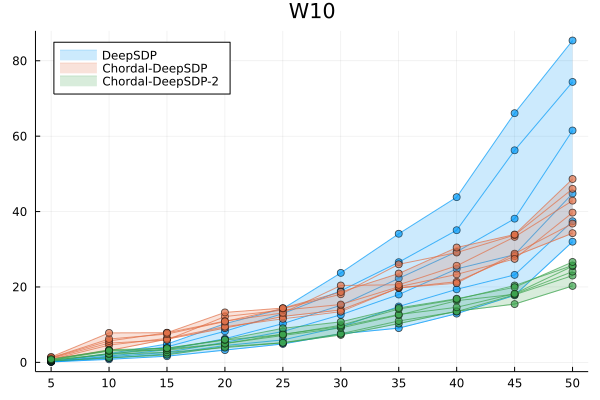

In [28]:
pw10 = makeWidthPlots(DEEPSDP_W_OUTER[1], CHORDALSDP_W_OUTER[1], CHORDALSDP2_W_OUTER[1], "W10")

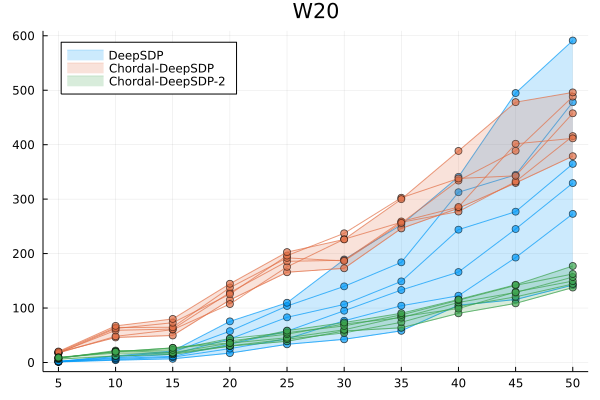

In [29]:
pw20 = makeWidthPlots(DEEPSDP_W_OUTER[2], CHORDALSDP_W_OUTER[2], CHORDALSDP2_W_OUTER[2], "W20")

In [30]:
df

LoadError: UndefVarError: df not defined